In [367]:
import pandas as pd
import spacy
import numpy as np

In [368]:
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

In [369]:
df = pd.read_csv("twitter4000.csv",encoding='latin1')

In [370]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [371]:
df['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

In [372]:
## Word Count
df['word_count']=df['twitts'].apply(lambda x:len(str(x).split()))

In [373]:
df.head()

,twitts,sentiment,word_count
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


In [374]:
df['word_count'].max()

32

In [375]:
df['word_count'].min()

1

In [376]:
df[df['word_count']==1]

,twitts,sentiment,word_count
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


In [377]:
## Character Count 
df['char_count'] = df['twitts'].apply(lambda x: len(str(x).replace(" ","")))

In [378]:
df.sample(5)

,twitts,sentiment,word_count,char_count
2993,@CVMINC wow that's quite the recommendation,1,6,38
882,"@yomissb yep, my dad a year ago... sucks",0,8,33
3841,@ddlovato you should totally wish @takemeback ...,1,12,64
1472,eyes are hurting from all the lunch time madness,0,9,40
1192,@tatylicous I wanted to dance with you awwwww ...,0,27,111


In [379]:
## Average Word Length

In [380]:
x= "this is" # 2 Words | 6 Characters | Average Word Length = 6/2 =3
y="thankyou guys" # Average Word Length = 12/2 =6

In [381]:
df['avg_word_length']=df['char_count']/df['word_count']

In [382]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length
3775,@nicky_power if you're truly addicted to twitt...,1,22,113,5.136364
1070,@ABBSound ??????? ????? ??? ???? ??? ??? ?? ??...,0,9,46,5.111111
3592,@reemakoul @purugovind public forum hai.. naam...,1,9,57,6.333333
2142,Off to start a long day of writing! Hope the s...,1,23,108,4.695652
2486,"@jackalltimelow i figured out it was you, caus...",1,12,52,4.333333


In [383]:
## Stop Words

In [384]:
print(stop_words)

{'your', 'itself', 'this', 'again', '‘ve', 'five', 'her', 'upon', 'although', 'my', 'regarding', 'side', 'therein', 'quite', 'amongst', 'themselves', 'none', 'does', 'hence', 'become', 'down', 'somewhere', 'could', 'a', 'both', 'sometimes', 'own', 'so', 'either', 'show', 'due', 'too', 'seem', 'nothing', 'whenever', 'him', 'until', 'along', 'keep', 'was', 'every', "'m", 'into', 'and', 'least', 'been', 'himself', 'therefore', 'enough', 'anyone', 'fifty', 'whatever', 'nine', 'thus', 'moreover', 'have', 'whose', 'against', 'anyway', 'whereafter', 'or', 'sixty', 'hereupon', 'otherwise', 'i', 'without', 'onto', 'full', 'perhaps', 'may', 'three', 'else', 'ours', "'d", 're', 'those', 'see', 'done', 'get', 'move', 'did', 'one', 'most', 'as', 'than', 'might', 'beside', 'mostly', 'then', 'everything', 'nowhere', 'before', 'about', 'sometime', 'what', 'while', '’s', 'all', '‘m', 'herself', 'some', 'the', 'yet', 'wherein', 'alone', 'amount', '’ll', 'out', 'anything', 'already', 'cannot', 'please', 

In [385]:
x = "i am a boy"
x.split()

['i', 'am', 'a', 'boy']

In [386]:
def stop_words_count(x):
    tmp = 0
    tmp_sentence = x.split()
    for i in tmp_sentence:
        if i in stop_words:
            tmp += 1
    return tmp

In [387]:
df['stop_words_count']=df['twitts'].apply(stop_words_count)

In [388]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count
499,@andylar1 HELL NO... THEY GOT YOUR CELLY NUMBER!,0,8,41,5.125,0
2858,Going to go &quot;camping&quot; in the fort wi...,1,10,51,5.100,6
177,"My cat snuck out, and is stalking somewhere ar...",0,20,79,3.950,10
1680,Oh my. Woke up with theeee illest headache o...,0,16,84,5.250,5
3714,@Zut_Radio You been Mega Zapping?,1,5,29,5.800,1


In [389]:
# Count #HashTags and @Mentions

In [390]:
x = "this is #hashtag and this is @mention"

In [391]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [392]:
[i for i in x.split() if i.startswith('@')]

['@mention']

In [393]:
[i for i in x.split() if i.startswith('#')]

['#hashtag']

In [394]:
df['hashtags_count']=df['twitts'].apply(lambda x : len([i for i in x.split() if i.startswith('#')]))

In [395]:
df['mentions_count']=df['twitts'].apply(lambda x : len([i for i in x.split() if i.startswith('@')]))

In [396]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count
3158,@jamesepain np just looking for cool people t...,1,23,111,4.826087,12,0,1
595,I have a tummy ache :&gt; LUZ &lt;:,0,8,28,3.500000,2,0,0
3165,I've finally got (most of) my energy back afte...,1,19,89,4.684211,7,0,0
152,@bagginsboy best part is i've got t4 to watch ...,0,11,49,4.454545,4,0,1
58,Just woke up. I was going to go workout but I'...,0,15,59,3.933333,6,0,0


In [397]:
# If numeric digits are present in twiits

In [398]:
x = 'this is 1 and 2'

In [399]:
x.split()

['this', 'is', '1', 'and', '2']

In [400]:
def numeric_count(x):
    tmp = 0
    for i in x.split():
        if i.isdigit():
            tmp+=1
    return tmp

In [401]:
df['numerical_count']=df['twitts'].apply(numeric_count)

In [402]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count
884,My nail varnish is all chipped and not the goo...,0,25,104,4.160000,12,0,0,0
1218,Keeps seein g the same hashtags over and over ...,0,16,69,4.312500,9,0,0,0
1318,Gots Golf in the morning. I love the sport but...,0,21,75,3.571429,13,0,0,0
1582,@MaryRose_M I've seen a few turtle on the road...,0,18,83,4.611111,8,0,1,0
243,Internet is getting damn slow today..,0,6,32,5.333333,1,0,0,0


In [403]:
# Upper case words count

In [404]:
x = "I AM HAPPY"
y = "i am happy"

In [405]:
def calculate_upper(x):
    tmp = 0
    for i in x.split():
        if i.isupper():
            tmp +=1
    return tmp

In [406]:
df['upper_case_count']=df['twitts'].apply(calculate_upper)

In [407]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count
3242,@DLoesch Love your radio show too,1,6,28,4.666667,3,0,1,0,0
3833,@beebo_wallace Good Night Beebo!,1,4,29,7.250000,0,0,1,0,0
894,Hard day for me http://myloc.me/40By,0,5,32,6.400000,2,0,0,0,0
1649,@epyonic unfortunately........... yes..,0,3,37,12.333333,0,0,1,0,0
661,is wondering why when David finally comes to E...,0,19,83,4.368421,8,0,0,0,1


In [408]:
## Lower case conversion

In [409]:
x = 'This is Text'

In [410]:
x.lower()

'this is text'

In [411]:
df['twitts']=df['twitts'].apply(lambda x: str(x).lower())

In [412]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count
79,"got no txtz,, itz cold,, home alone and nothin...",0,12,46,3.833333,0,0,0,0,0
245,i have like 3 mosquitos on my neck,0,8,27,3.375000,3,0,0,1,1
3498,bout to get a little coffee. gettin my own ba...,1,20,73,3.650000,11,0,0,0,0
2701,butter fact tonight,1,3,17,5.666667,0,0,0,0,3
746,ready to work 6 days in a row! . okay maybe im...,0,13,38,2.923077,4,0,0,1,0


In [413]:
## Contaction to extraction

In [414]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [415]:
x = "i'm don't he'll" # i am do not he will

In [416]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [417]:
cont_to_exp(x)

"i'm do not he shall / he will"

In [418]:
df['twitts']=df['twitts'].apply(cont_to_exp)

In [419]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count
1707,another dull fest in the f1 again,0,7,27,3.857143,3,0,0,0,1
1838,went to the #dforum festival.very interesting....,0,19,116,6.105263,8,2,0,0,1
2434,planning on heading to knox after tomorrows la...,1,9,45,5.000000,4,0,0,0,0
3080,"hooray,.. it has / it is saturday..!",1,3,24,8.000000,0,0,0,0,0
3952,badmouthing someone. i really really really ha...,1,8,48,6.000000,0,0,0,0,6


In [420]:
df[df['twitts'].str.contains('hotmail\.com')]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [421]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [422]:
x = "@secureness arghh me please ts741127_56@gmail.com"

In [423]:
import re

In [424]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

['ts741127_56@gmail.com']

In [425]:
df['emails']=df['twitts'].apply(lambda x : re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))

In [426]:
df['email_count']=df['emails'].apply(lambda x : len(x))

In [427]:
df[df['email_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [428]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x)

'@secureness arghh me please '

In [429]:
df['twitts']=df['twitts'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x))

In [430]:
df[df['email_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [431]:
# Count URLS and remove it

In [432]:
x = "hi, thanks to order. for more visit https://localbazer.com/?q=1"

In [433]:
re.findall(r'(ftp|http|https):\/\/(\w+:{0,1}\w*@)?(\S+)(:[0-9]+)?(\/|\/([\w#!:.?+=&%@!\-\/]))?',x)

[('https', '', 'localbazer.com/?q=1', '', '', '')]

In [434]:
df['url_flags']=df['twitts'].apply(lambda x : len(re.findall(r'(ftp|http|https):\/\/(\w+:{0,1}\w*@)?(\S+)(:[0-9]+)?(\/|\/([\w#!:.?+=&%@!\-\/]))?',x)))

In [435]:
df[df['url_flags']>0]['twitts']

16      @brianquest i made 1 fo u 2: http://bit.ly/eid...
98              heading to work  http://twitpic.com/4eojz
99      @blondeblogger http://twitpic.com/4w8hk - i'm ...
144              i miss you  ã¢ââ« http://blip.fm/~8lc2f
183      photo: miss germany  http://tumblr.com/xf825f012
                              ...                        
3819    new staark video of &quot;sweet release&quot; ...
3826    http://tinyurl.com/kwmynq helmet - unsung to s...
3837    @r0ckergirl14 wow sweet again!!  http://twitpi...
3958    someone has been creative with my #deskmess wh...
3974    @gtucker13 http://twitpic.com/6tw87 - no reall...
Name: twitts, Length: 185, dtype: object

In [436]:
x

'hi, thanks to order. for more visit https://localbazer.com/?q=1'

In [437]:
re.sub(r'(ftp|http|https):\/\/(\w+:{0,1}\w*@)?(\S+)(:[0-9]+)?(\/|\/([\w#!:.?+=&%@!\-\/]))?',"",x)

'hi, thanks to order. for more visit '

In [438]:
df['twitts']=df['twitts'].apply(lambda x : re.sub(r'(ftp|http|https):\/\/(\w+:{0,1}\w*@)?(\S+)(:[0-9]+)?(\/|\/([\w#!:.?+=&%@!\-\/]))?',"",x))

In [439]:
# Remove RT (Retweet)

In [440]:
x = 'rt@username: hello hirt'

In [441]:
re.sub(r'\brt\b','',x).strip()

'@username: hello hirt'

In [442]:
df['twitts']=df['twitts'].apply(lambda x : re.sub(r'\brt\b','',x).strip())

In [443]:
# Special chars removal or punctuation removal

In [444]:
x = '@tanmoy741127 i am good .....'

In [445]:
re.sub(r'[^\w ]+',"",x)

'tanmoy741127 i am good '

In [446]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'[^\w ]+',"",x))

In [447]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count,url_flags
1070,abbsound,0,9,46,5.111111,0,0,1,0,0,[],0,0
770,is stuck at work on this beautiful day,0,8,32,4.000000,3,0,0,0,0,[],0,0
2763,drivin around with my best friend windows down...,1,12,68,5.666667,5,0,0,0,0,[],0,0
2751,damohopo thankyou bet your eye looks lovely c...,1,24,105,4.375000,9,0,1,0,0,[],0,0
997,spedi have left the jungle that means no more ...,0,16,68,4.250000,8,0,0,0,1,[],0,0


In [448]:
## Remove multiple spaces

In [449]:
x = 'hi      hello   how are you'

In [450]:
' '.join(x.split())

'hi hello how are you'

In [451]:
df['twitts']=df['twitts'].apply(lambda x: ' '.join(x.split()))

In [452]:
## Reomve HTML tags

In [453]:
from bs4 import BeautifulSoup

In [454]:
x = '<html><head><title>My cool Website</title></head><body>OK</body></html>'

In [455]:
BeautifulSoup(x,'lxml').get_text()

'My cool WebsiteOK'

In [456]:
df['twitts']=df['twitts'].apply(lambda x : BeautifulSoup(x,'lxml').get_text())

In [457]:
## Remove Accented Chars

In [458]:
x="soupçon"

In [459]:
import unicodedata

In [460]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [461]:
remove_accented_chars(x)

'soupcon'

In [462]:
df['twitts']=df['twitts'].apply(remove_accented_chars)

In [463]:
# remove stop words

In [464]:
x = "this is a stop words"

In [465]:
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [466]:
' '.join([t for t in x.split() if t not in stop_words])

'stop words'

In [467]:
df['twitts_no_stop']=df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in stop_words]))

In [468]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count,url_flags,twitts_no_stop
2433,painting my nails orange at 2 am texting my gi...,1,19,78,4.105263,7,0,0,1,0,[],0,0,painting nails orange 2 texting girl maybe ill...
1850,blacnic i know u do not luv me no more that ha...,0,16,56,3.500000,5,0,1,0,1,[],0,0,blacnic know u luv y u hittin
2606,thanks for following us please take 15 off our...,1,16,97,6.062500,6,0,0,0,1,[],0,1,thanks following 15 handmade finds code tweet15
792,im tired of these hussie bscott26 luvnless35 d...,0,22,112,5.090909,9,0,1,0,0,[],0,0,im tired hussie bscott26 luvnless35 hoodrat th...
3859,loves simon cowell he is such a legend,1,8,33,4.125000,4,0,0,0,1,[],0,0,loves simon cowell legend


In [469]:
# convert into base or root form of word

In [470]:
nlp = spacy.load('en_core_web_sm')

In [471]:
x = "chocolates balls times. this is chocolates. what is times?"

In [472]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    for token in doc:
        lemmatized = str(token.lemma_)
        if lemmatized == "-PRON-" or lemmatized == "be":
            lemmatized = token.text
        x_list.append(lemmatized)
    return ' '.join(x_list)

In [473]:
make_to_base(x)

'chocolate ball time . this is chocolate . what is time ?'

In [474]:
df['twitts']=df['twitts'].apply(lambda x: make_to_base(x))

In [475]:
## Common words removal

In [476]:
x = "this is this okay bye"

In [477]:
text = ' '.join(df['twitts'])
len(text)

275728

In [478]:
text=text.split()

In [479]:
len(text)

54900

In [481]:
freq_com = pd.Series(text).value_counts()

In [484]:
f20=freq_com[:20]

In [485]:
f20

i       2485
to      1461
the     1299
have    1000
a        957
not      916
is       912
it       891
my       825
you      773
and      709
do       617
in       571
that     523
for      521
of       482
go       479
m        474
get      452
me       432
dtype: int64

In [487]:
df['twitts']=df['twitts'].apply(lambda x : ' '.join([t for  t in x.split() if t not in f20]))

In [488]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count,url_flags,twitts_no_stop
2248,oh yay forget come back now watch today three ...,1,26,107,4.115385,11,0,0,0,1,[],0,0,oh yay forgot come watched today movies intere...
2639,mouseholecat wow xx,1,3,19,6.333333,0,0,1,0,0,[],0,0,mouseholecat wow xx
1217,can sleep,0,2,12,6.000000,1,0,0,0,0,[],0,0,sleep
88,eurgh throat dry want drink,0,9,30,3.333333,4,0,0,0,0,[],0,0,eurgh throat dry want drink
3351,beehughes118 thank follow,1,6,34,5.666667,3,0,1,0,0,[],0,0,beehughes118 thank follow


In [489]:
# Rare words removal

In [491]:
rare20=freq_com.tail(20)

In [492]:
df['twitts']=df['twitts'].apply(lambda x : ' '.join([t for  t in x.split() if t not in rare20]))

In [493]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hashtags_count,mentions_count,numerical_count,upper_case_count,emails,email_count,url_flags,twitts_no_stop
3339,sew another watermelon creation can resist,1,7,45,6.428571,1,0,0,0,1,[],0,0,sewing watermelon creation resist
2573,awesome night city,1,5,21,4.200000,2,0,0,0,0,[],0,0,awesome night city
3983,about watch laker win game duece modern day cl...,1,14,60,4.285714,3,0,0,0,0,[],0,0,watch lakers win game duece im modern day cleo...
1947,shontane haha oh those are pretty stilllllll o...,0,13,65,5.000000,4,0,1,0,0,[],0,0,shontane haha oh pretty stilllllll going sampe...
3093,puntofisso no probs spot pingback on footytwee...,1,13,69,5.307692,4,0,1,0,1,[],0,0,puntofisso probs spotted pingback footytweets ...


In [494]:
# Word cloud visualization

In [496]:
!pip install wordcloud

In [497]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [499]:
text = ' '.join(df['twitts'])

In [503]:
wc = WordCloud(width=1600,height=800).generate(text)

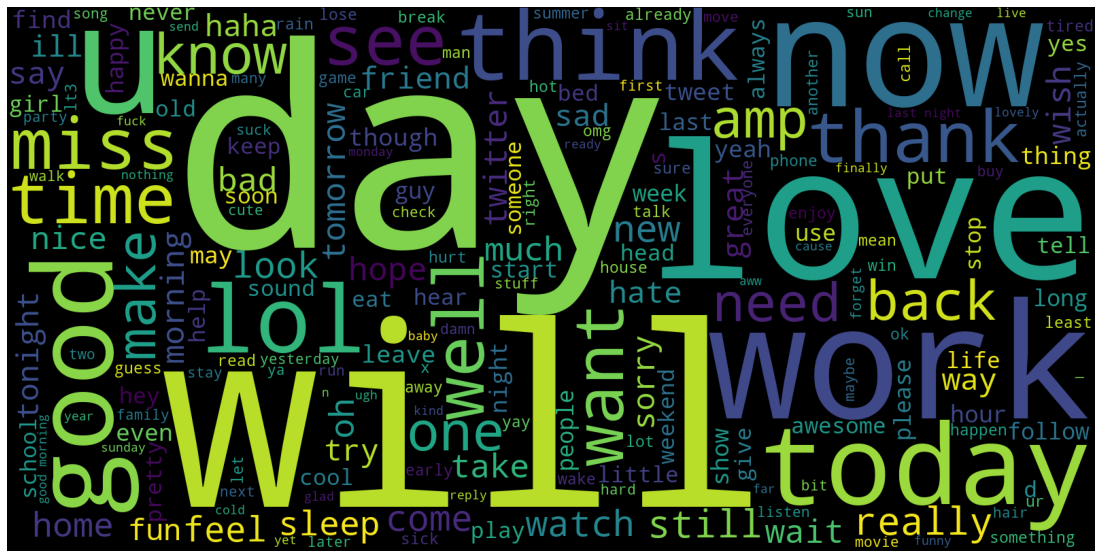

In [507]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [508]:
## Spelling Correction

In [509]:
!pip install -U textblob

In [511]:
## python -m textblob.download_corpora

In [512]:
from textblob import TextBlob

In [517]:
x = 'thankks for waching it'

In [518]:
TextBlob(x).correct()

TextBlob("thanks for watching it")

In [519]:
## Tokentization using TextBlob

In [523]:
x = "thanks#watching this video. please make it"

In [524]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'make', 'it'])

In [525]:
doc = nlp(x)

In [526]:
for token in doc:
    print(token)

thanks#watching
this
video
.
please
make
it


In [527]:
# Detecting Nouns

In [539]:
x = "Breaking News : Donal trump, the president of USA is looking to play football"

In [540]:
doc = nlp(x)

In [541]:
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donal trump
the president
USA
football


In [542]:
## Language translation and detection

In [543]:
x

'Breaking News : Donal trump, the president of USA is looking to play football'

In [544]:
tb = TextBlob(x)

In [545]:
tb.detect_language()

'en'

In [548]:
tb.translate(to='bn')

TextBlob("ব্রেকিং নিউজ: যুক্তরাষ্ট্রের রাষ্ট্রপতি ডোনাল ট্রাম্প ফুটবল খেলতে দেখছেন")

In [549]:
## Sentiment Prediction

In [550]:
from textblob.sentiments import NaiveBayesAnalyzer

In [552]:
x = "we all standds together. we are gonna win this fight"

In [556]:
TextBlob(x,analyzer=NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.88544901990379, p_neg=0.11455098009621044)